In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
 df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

{'age': True, 'duration': True, 'campaign': True, 'pdays': True, 'previous': True, 'emp.var.rate': False, 'cons.price.idx': False, 'cons.conf.idx': True, 'euribor3m': False, 'nr.employed': False},

 Visualization of outlier columns


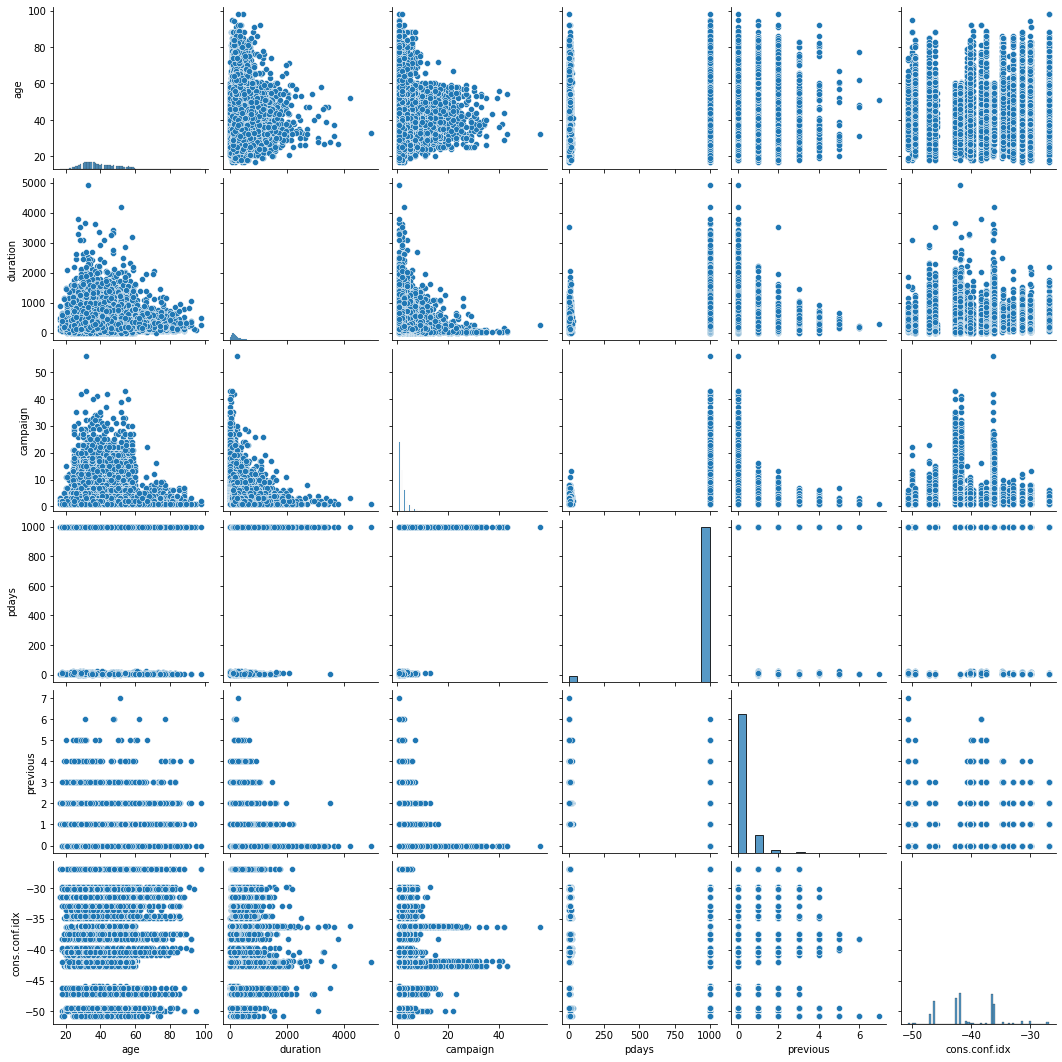

In [7]:
# to check for outliers in the numerical columns
def outlier_vars(df, show_plot=True):
    
    outliers = []
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    num_df = df.select_dtypes(include='number')
    result = dict ((((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))==True).any())
    for k,v in result.items():
        if v == True:
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(df[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        return pair_plot
    else:
        return df[outliers]
    
    
outlier_vars(df)

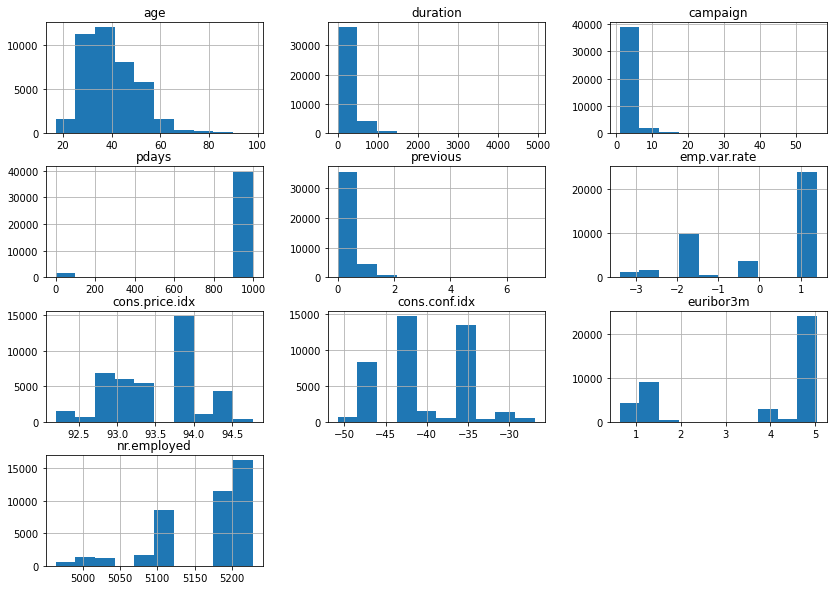

In [8]:
# checking for skewness
df.hist(bins= 10, figsize=(14, 10))
plt.show()

# Distribution of Variable Y

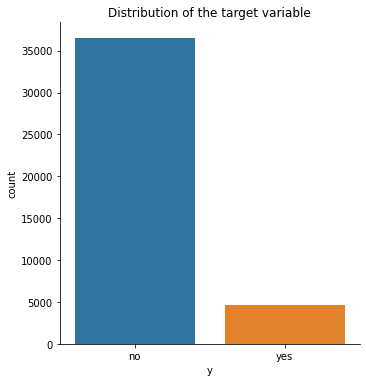

In [9]:
sns.catplot(x ="y",data = df,kind ="count")
plt.title("Distribution of the target variable")
plt.show()

# Graphical Representation

JOB

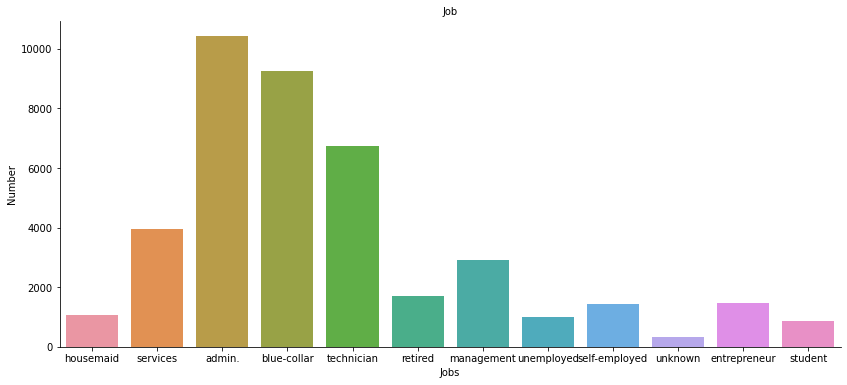

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Jobs', fontsize=10)
ax.set_ylabel('Number', fontsize=10)
ax.set_title('Job', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

JOB AND VARIABLE Y

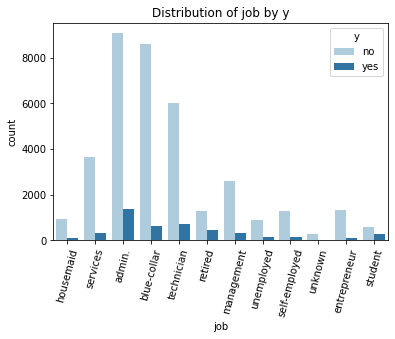

In [11]:
sns.countplot(x="job",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of job by y")
plt.xticks(rotation = 75)
plt.show()

EDUCATION

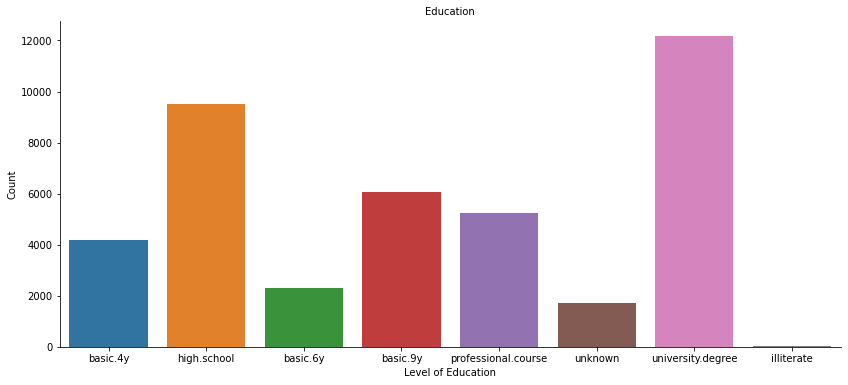

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Level of Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

EDUCATION AND TARGET VARIABLE Y

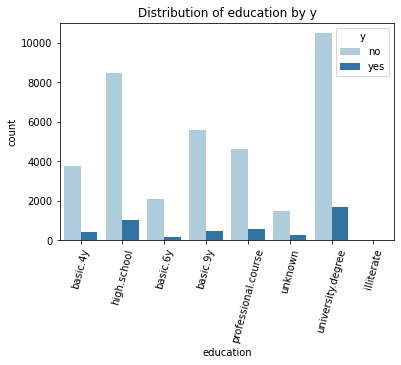

In [13]:
sns.countplot(x="education",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of education by y")
plt.xticks(rotation = 75)
plt.show()

MARITAL

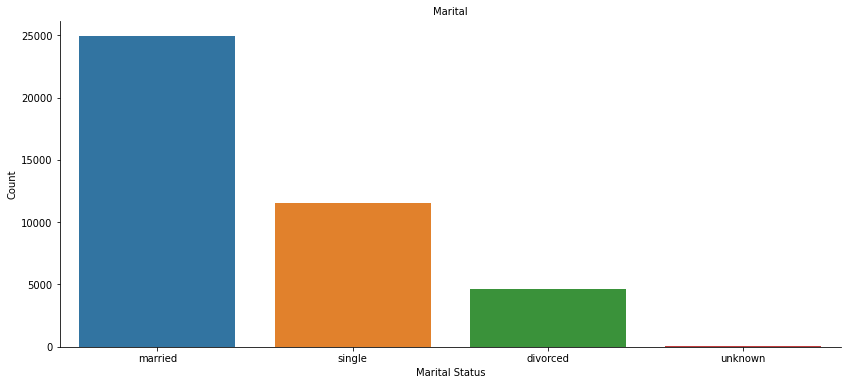

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital Status', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

MARITAL AND TARGET VARIABLE

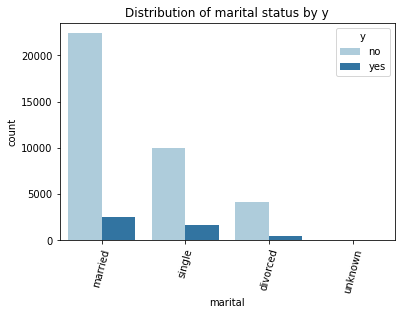

In [15]:
sns.countplot(x="marital",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of marital status by y")
plt.xticks(rotation = 75)
plt.show()

POUTCOME

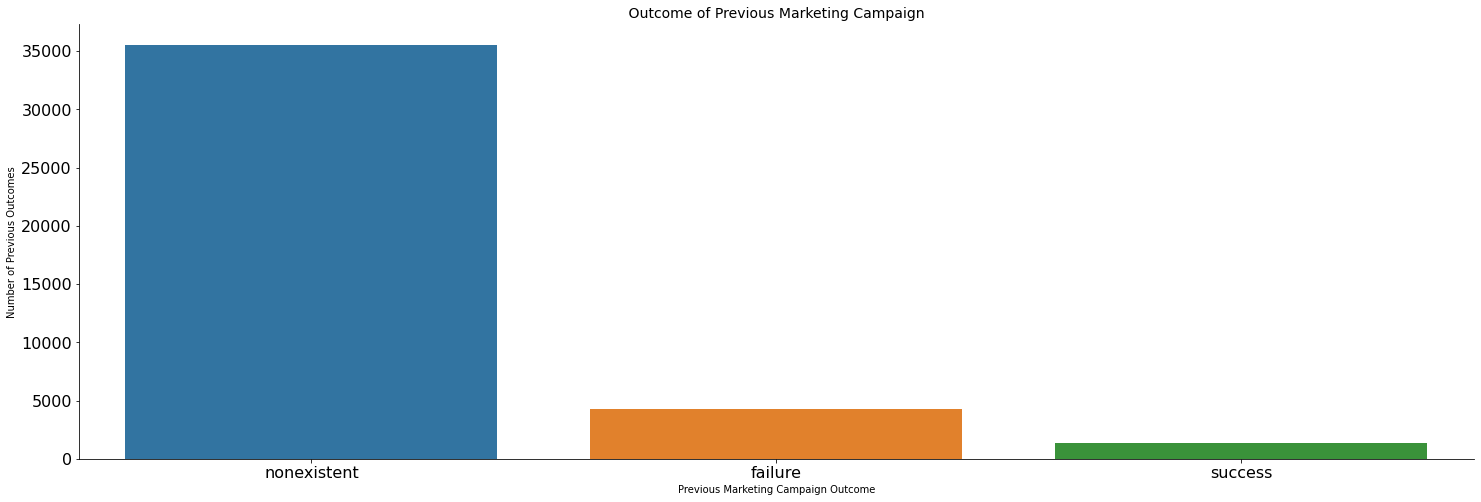

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df)
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=10)
ax.set_ylabel('Number of Previous Outcomes', fontsize=10)
ax.set_title(' Outcome of Previous Marketing Campaign ', fontsize=14)
ax.tick_params(labelsize=16)
sns.despine()

POUTCOME AND TARGET VARIABLE

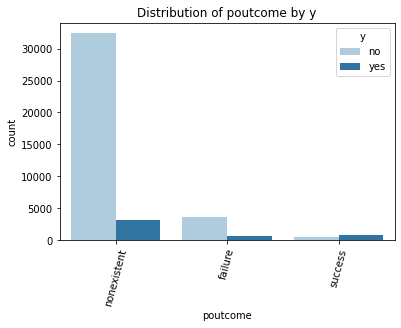

In [17]:
sns.countplot(x="poutcome",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of poutcome by y")
plt.xticks(rotation = 75)
plt.show()

DAY OF WEEK, MONTH, CONTACT

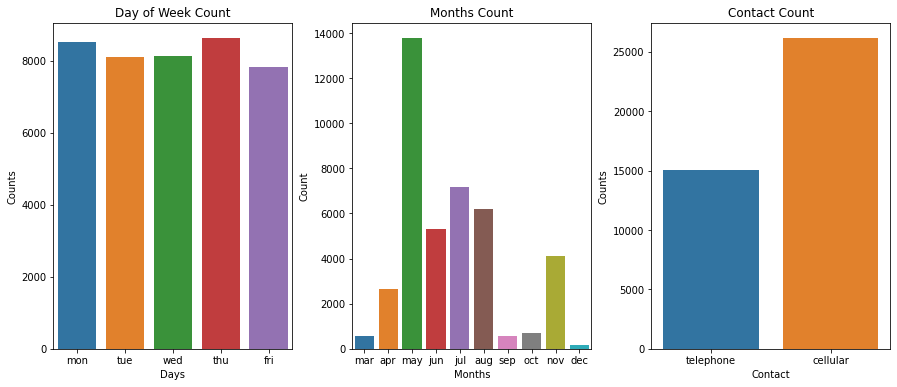

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df['day_of_week'], ax = ax1)
ax1.set_xlabel('Days', fontsize = 10)
ax1.set_ylabel('Counts', fontsize = 10)
ax1.set_title('Day of Week Count')
ax1.tick_params(labelsize=10)

sns.countplot(df['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Count')
ax2.set_title('Months Count')
ax2.tick_params(labelsize=10)

sns.countplot(df['contact'], ax = ax3)
ax3.set_xlabel('Contact', fontsize = 10)
ax3.set_ylabel('Counts')
ax3.set_title('Contact Count')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

DAY OF WEEK AND TARGET VARIABLE

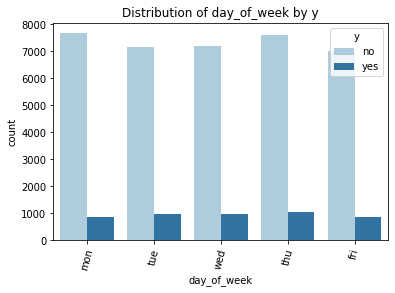

In [19]:
sns.countplot(x="day_of_week",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of day_of_week by y")
plt.xticks(rotation = 75)
plt.show()

MONTH AND TARGET VARIABLE

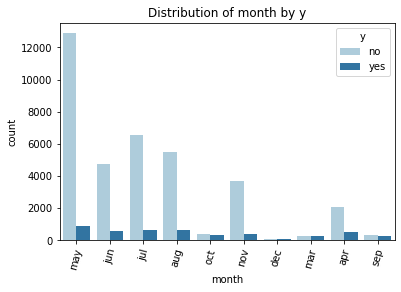

In [20]:
sns.countplot(x="month",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of month by y")
plt.xticks(rotation = 75)
plt.show()

CONTACT AND TARGET VARIABLE

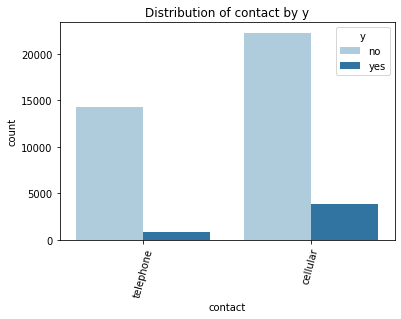

In [21]:
sns.countplot(x="contact",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of contact by y")
plt.xticks(rotation = 75)
plt.show()

LOAN, DEFAULT, HOUSING

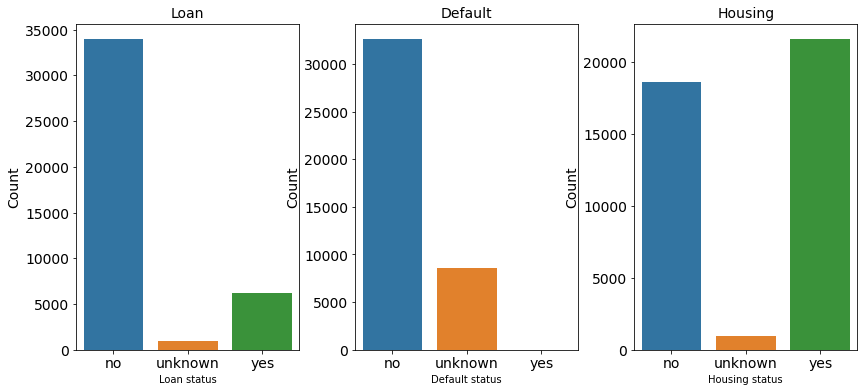

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))
sns.countplot(x = 'loan', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Loan', fontsize=14)
ax1.set_xlabel('Loan status')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(labelsize=14)

sns.countplot(x = 'default', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Default', fontsize=14)
ax2.set_xlabel('Default status')
ax2.set_ylabel('Count', fontsize=14)
ax2.tick_params(labelsize=14)

sns.countplot(x = 'housing', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Housing', fontsize=14)
ax3.set_xlabel('Housing status')
ax3.set_ylabel('Count', fontsize=14)
ax3.tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.25)

LOAN AND TARGET VARIABLE

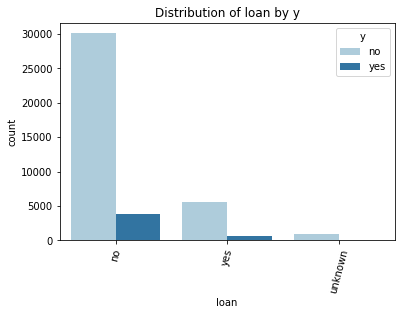

In [23]:
sns.countplot(x="loan",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of loan by y")
plt.xticks(rotation = 75)
plt.show()

DEFAULT AND TARGET VARIABLE

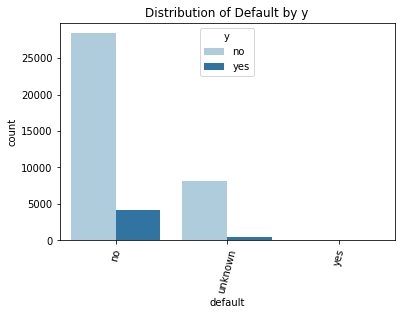

In [24]:
sns.countplot(x="default",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of Default by y")
plt.xticks(rotation = 75)
plt.show()

HOUSING AND TARGET VARIABLE

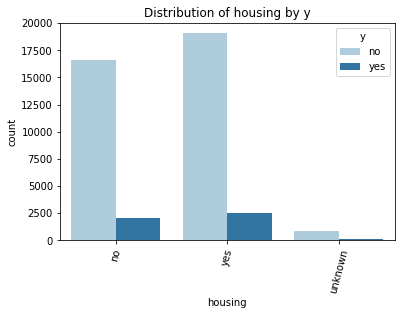

In [25]:
sns.countplot(x="housing",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of housing by y")
plt.xticks(rotation = 75)
plt.show()

In [26]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(df,size=10).map(sns.distplot,columns)
    else:
       plot=sns.FacetGrid(df,hue=hue,size=10).map(sns.distplot,columns)
       plt.legend()

AGE

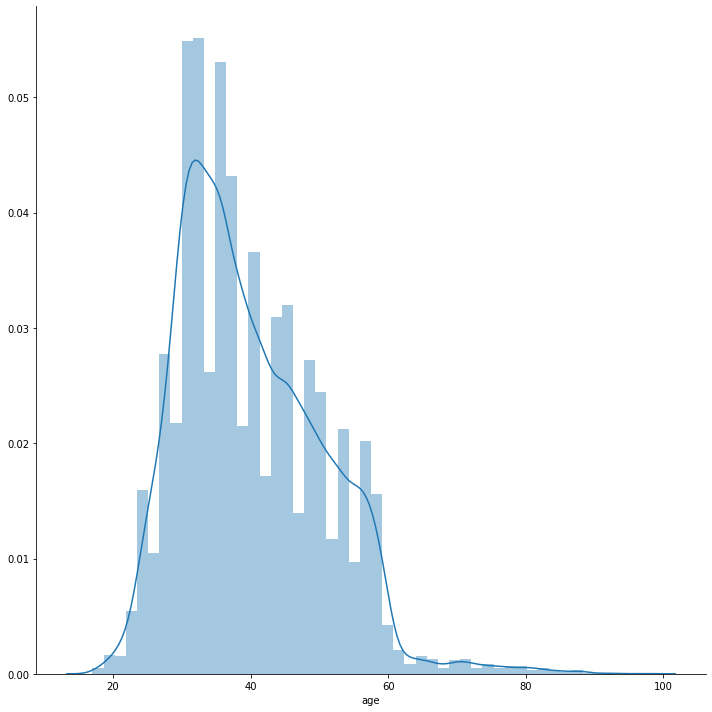

In [27]:
plotting_kd(df,'age')

AGE AND TARGET VARIABLE

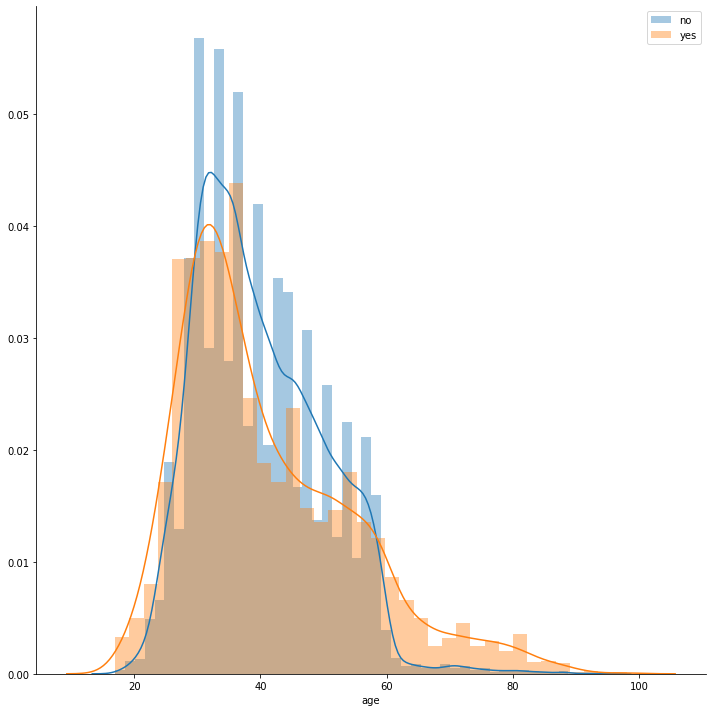

In [28]:
plotting_kd(df,'age',hue='y')

DURATION 

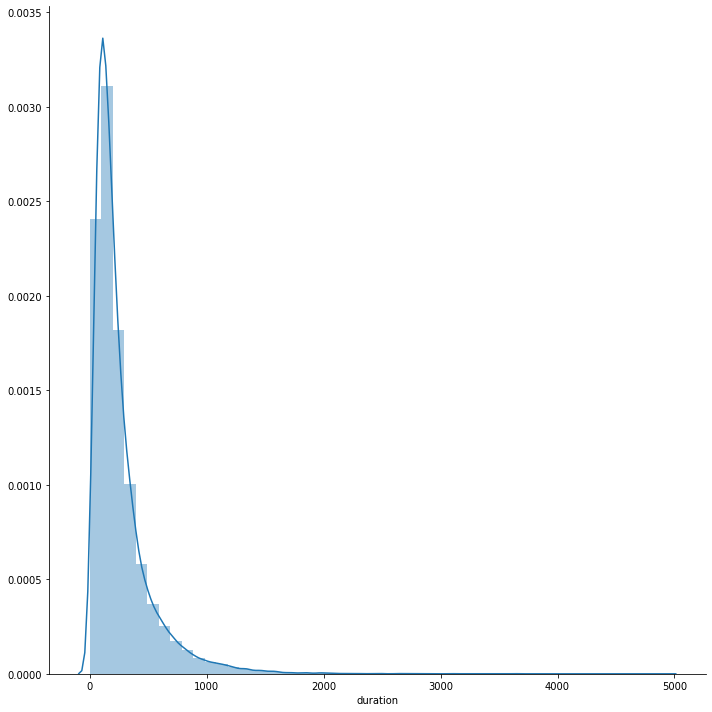

In [29]:
plotting_kd(df,'duration')

DURATION AND TARGET VARIABLE

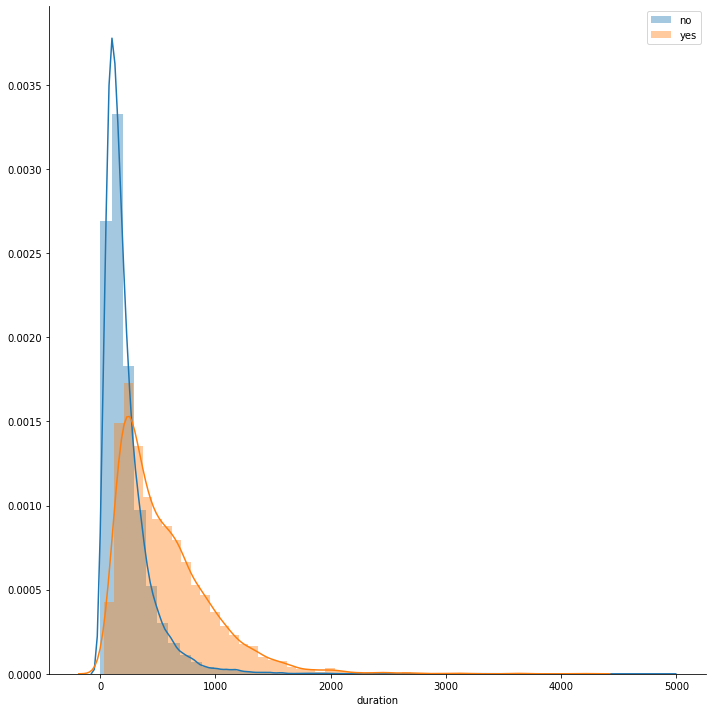

In [30]:
plotting_kd(df,'duration',hue='y')

CAMPAIGN

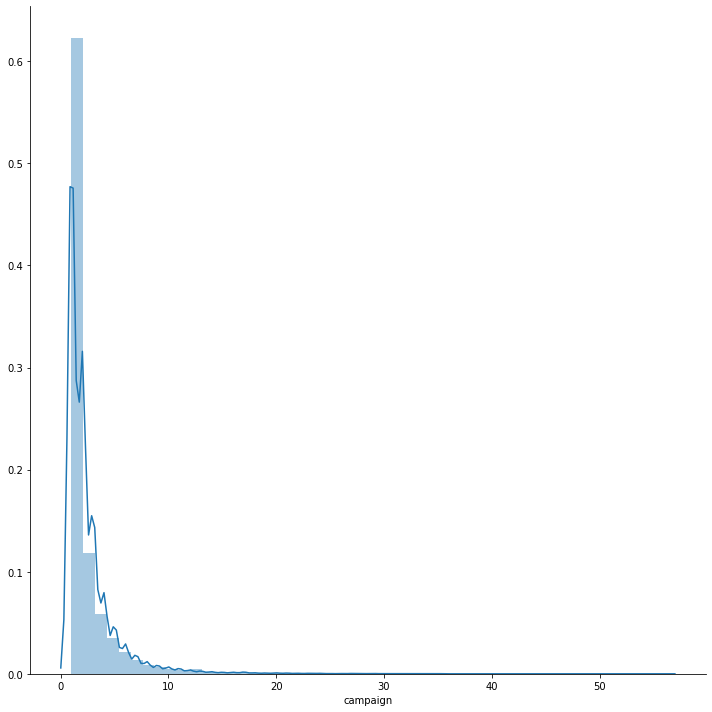

In [31]:
plotting_kd(df,'campaign')

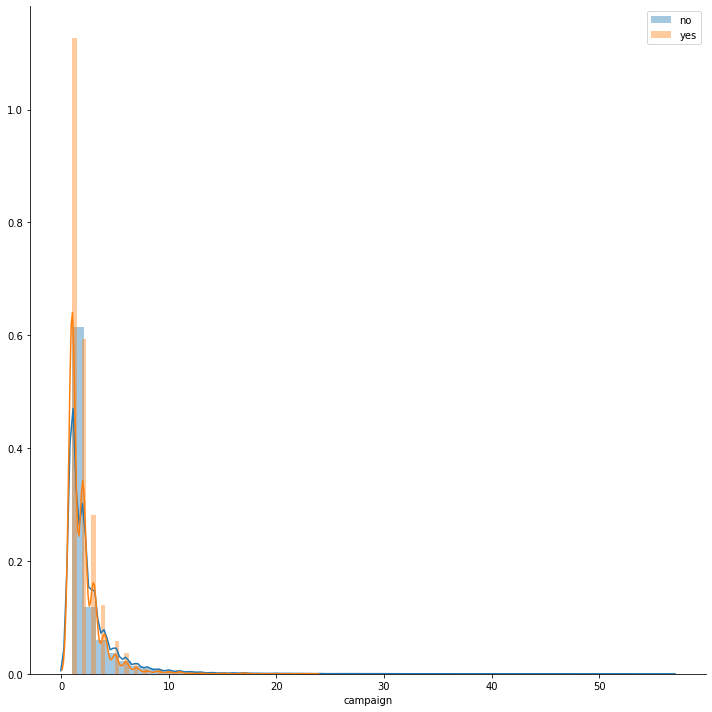

In [32]:
plotting_kd(df,'campaign',hue='y')

PDAYS

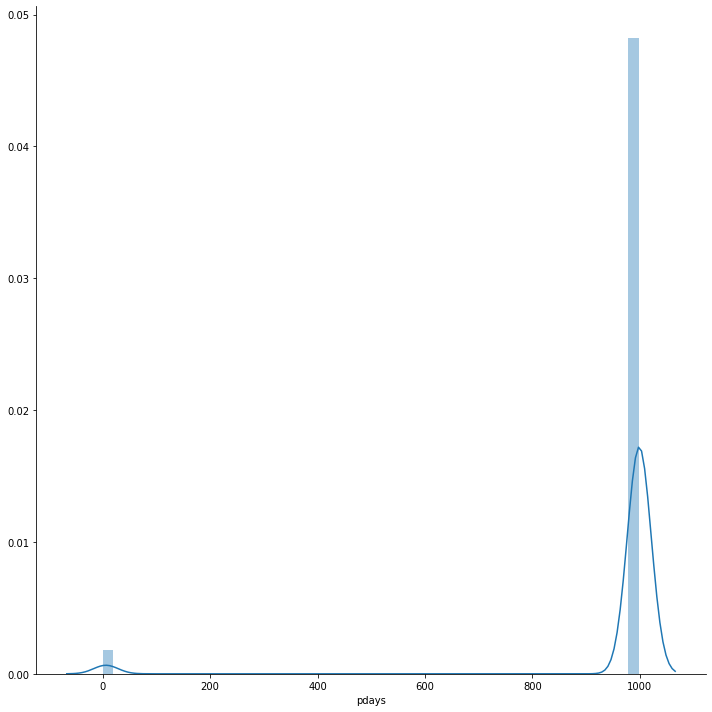

In [33]:
plotting_kd(df,'pdays')

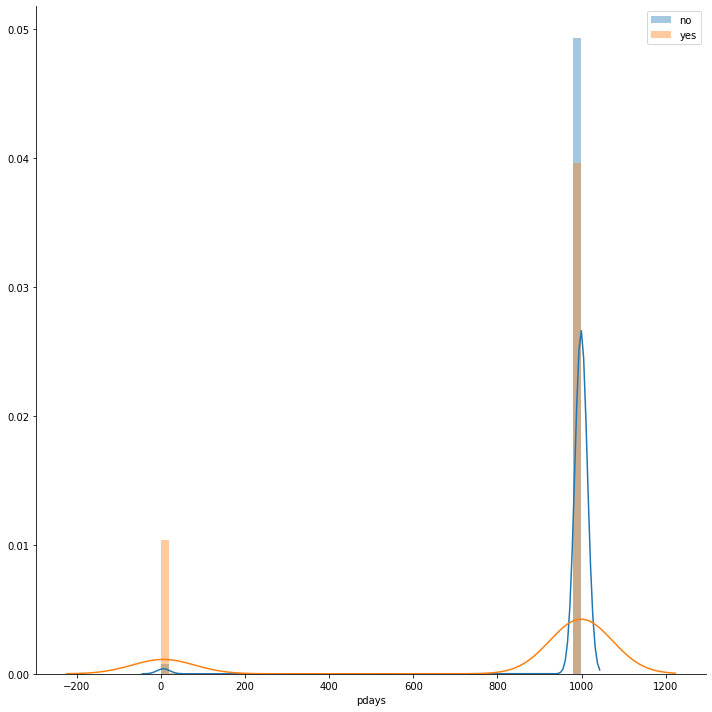

In [34]:
plotting_kd(df,'pdays',hue='y')

PREVIOUS

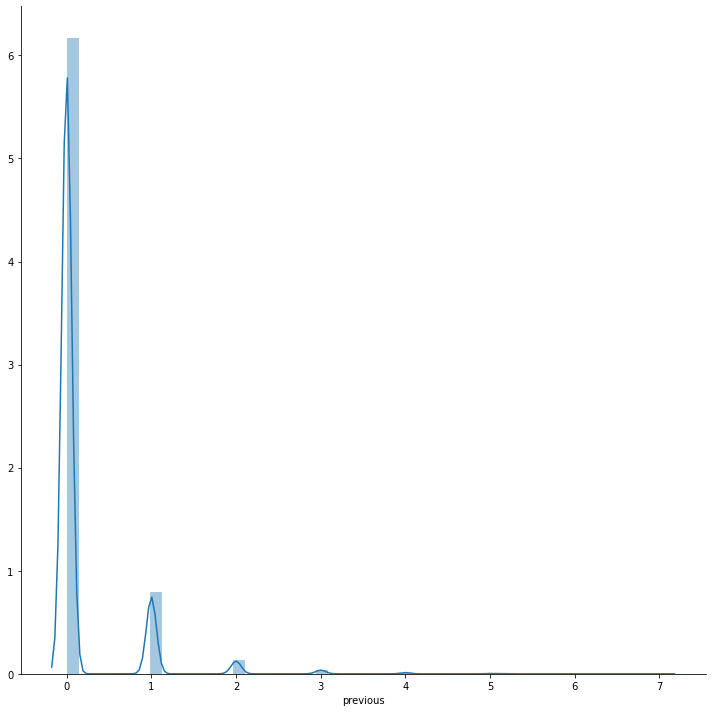

In [35]:
plotting_kd(df,'previous')

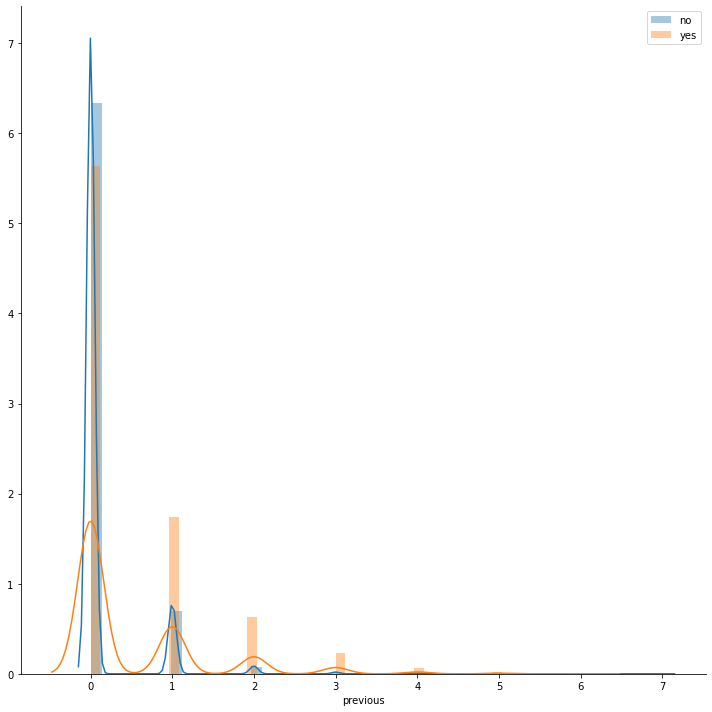

In [36]:
plotting_kd(df,'previous',hue='y')

EMP.VAR.RATE

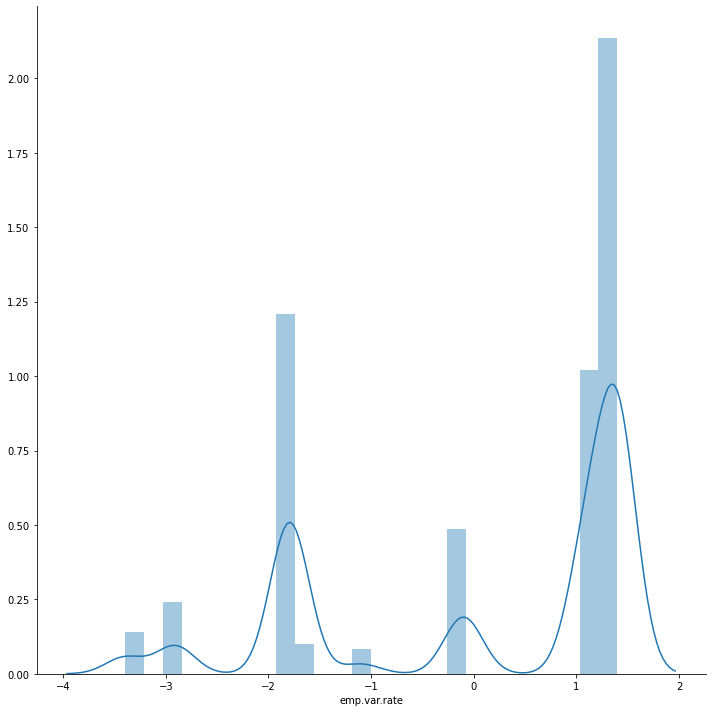

In [37]:
plotting_kd(df,'emp.var.rate')

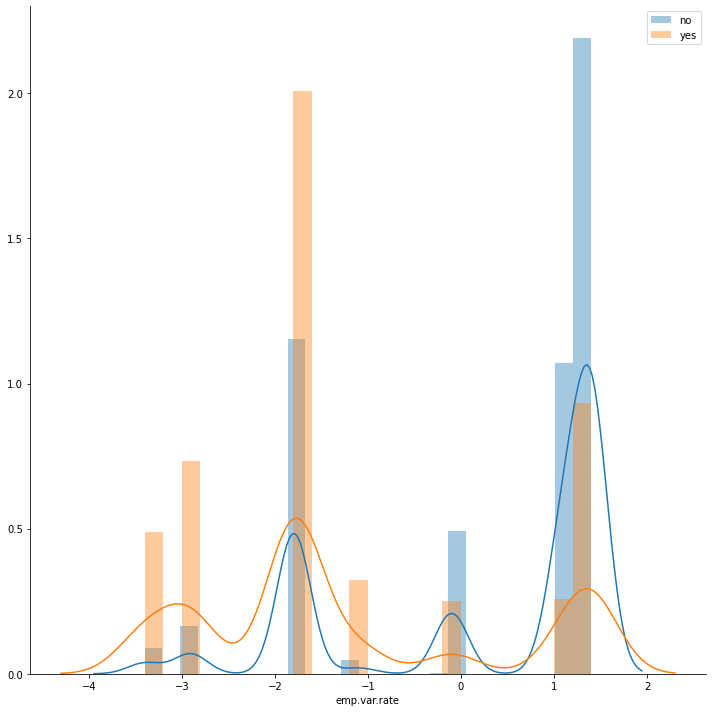

In [38]:
plotting_kd(df,'emp.var.rate',hue='y')

CONS.PRICE.INDEX

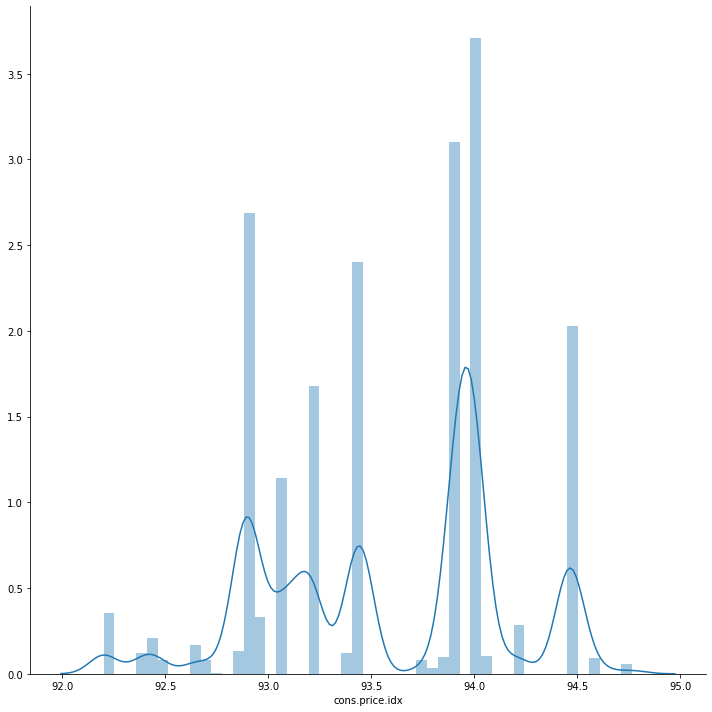

In [39]:
plotting_kd(df,'cons.price.idx')

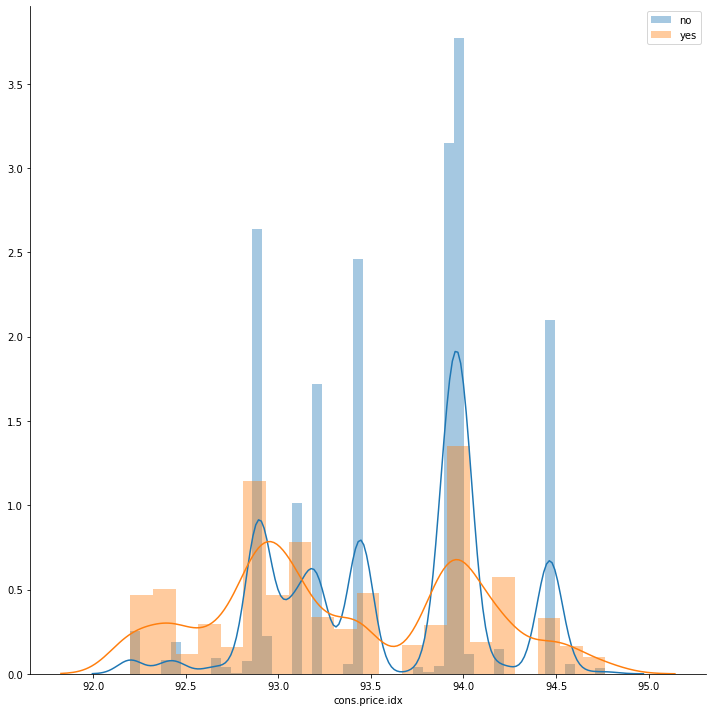

In [40]:
plotting_kd(df,'cons.price.idx',hue='y')

EURIBOR3M

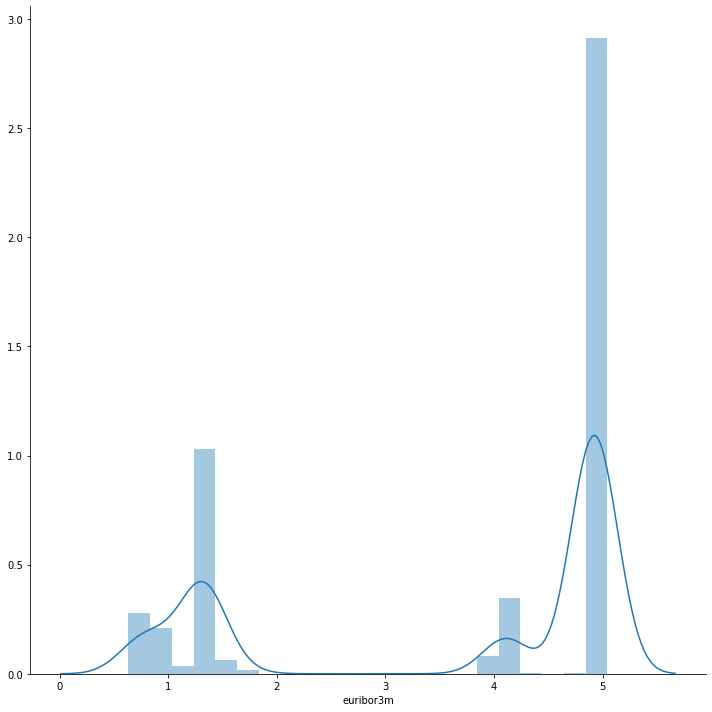

In [41]:
plotting_kd(df,'euribor3m')

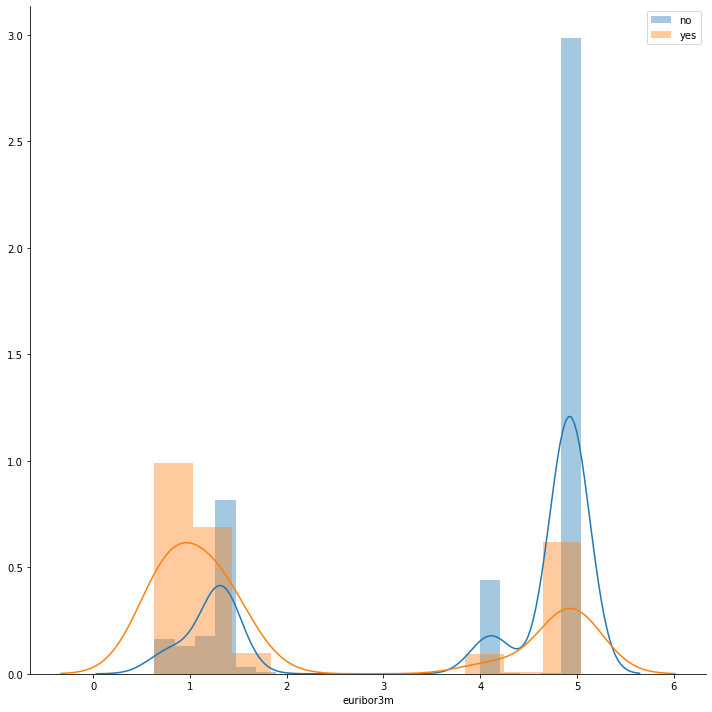

In [42]:
plotting_kd(df,'euribor3m',hue='y')

NR.EMPLOYED

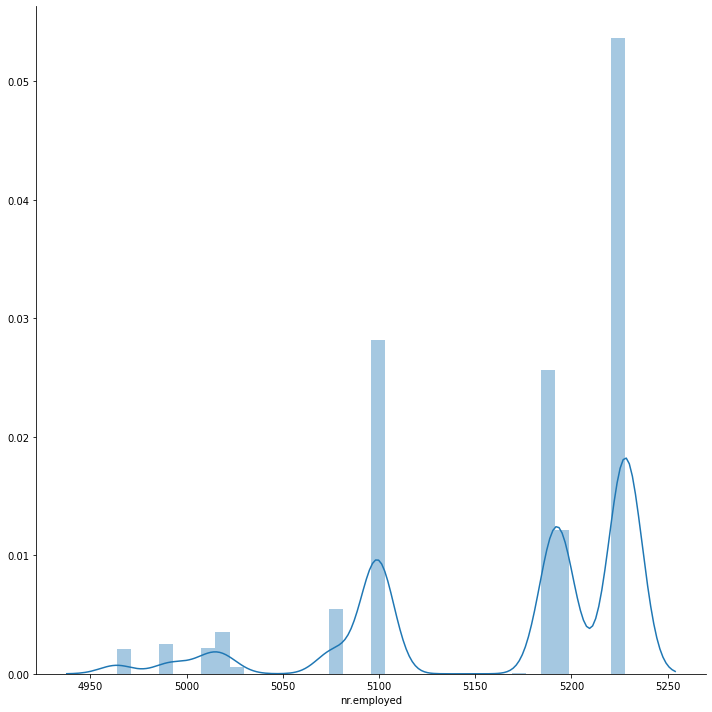

In [43]:
plotting_kd(df,'nr.employed')

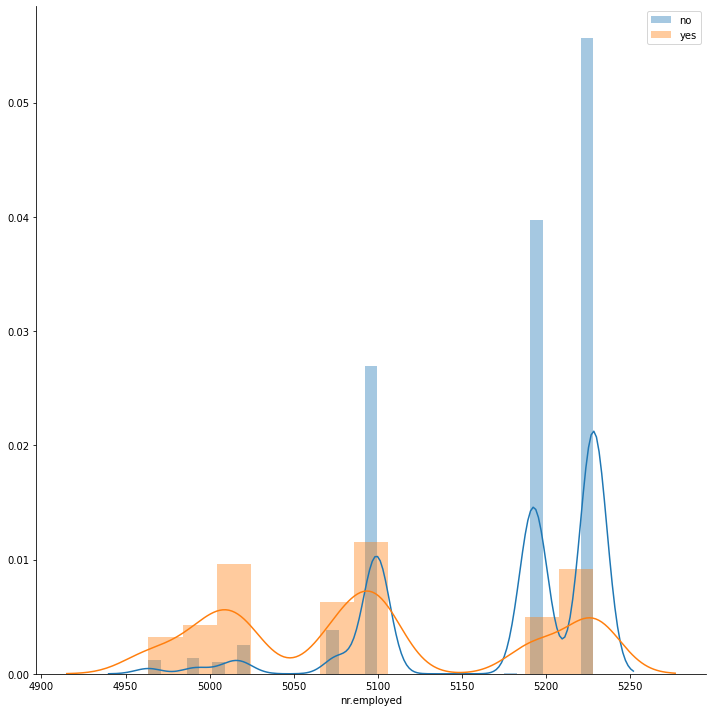

In [44]:
plotting_kd(df,'nr.employed',hue='y')

CONS.CONF.IDX

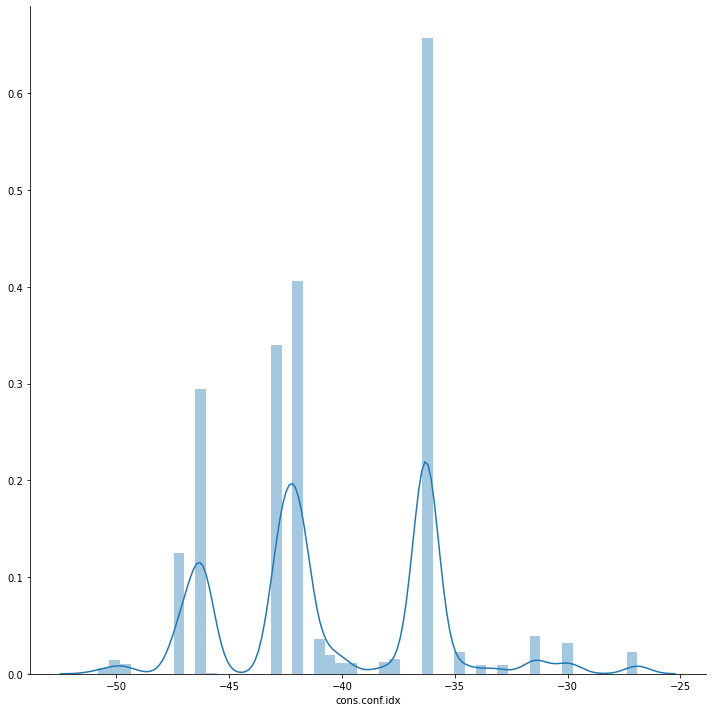

In [45]:
plotting_kd(df,'cons.conf.idx')

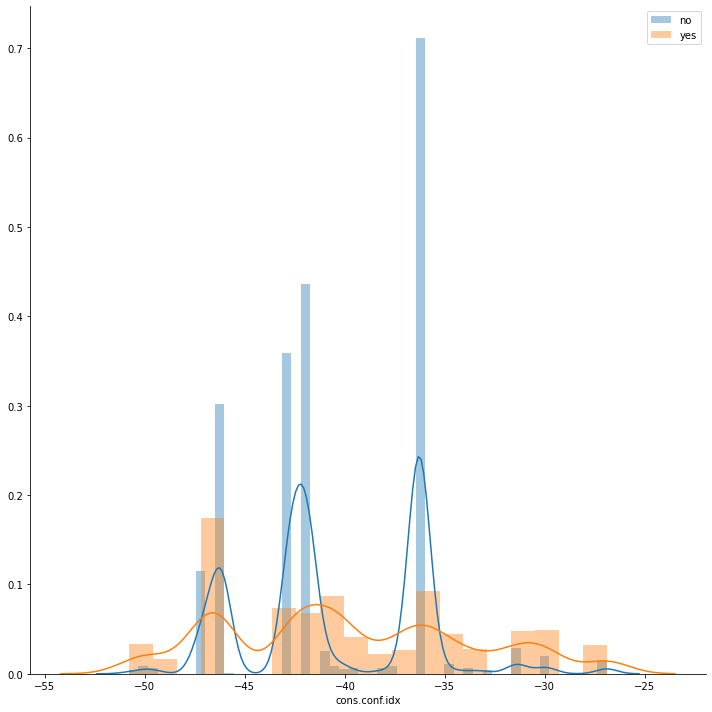

In [46]:
plotting_kd(df,'cons.conf.idx',hue='y')

# CORRELATION MATRIX

<AxesSubplot:>

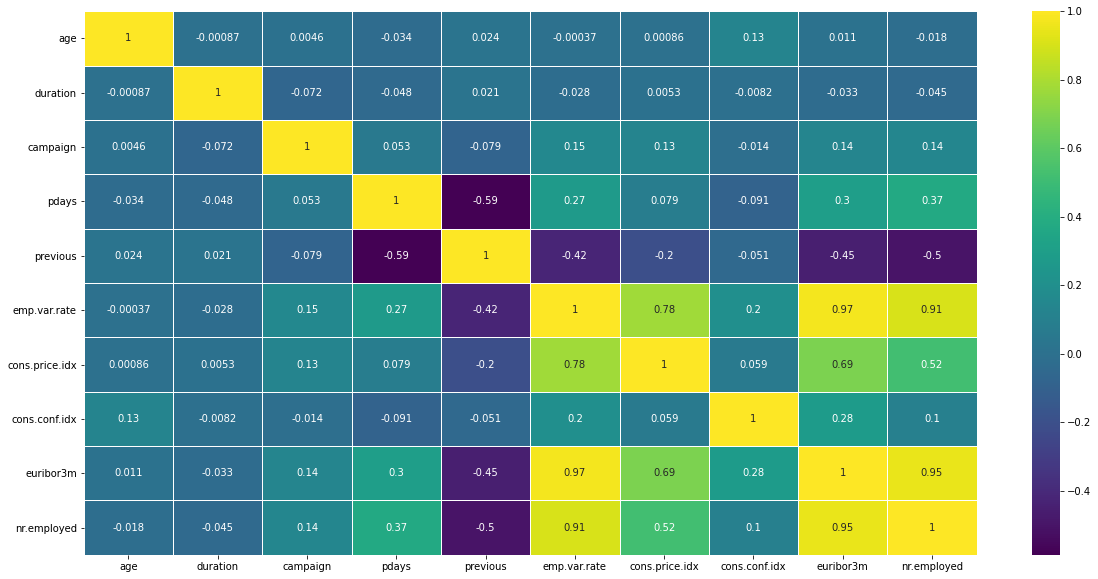

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

DATA CLEANSING AND TRANSFORMATION

In [48]:
df = df.drop(["duration"],axis=1)

In [49]:
df['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic','unknown':'illiterate'},inplace=True)
df['job'].replace({'self-employed':'entrepreneur'},inplace=True)

In [50]:
df1 = df

In [51]:
df1['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
housemaid        1060
unemployed       1014
student           875
unknown           330
Name: job, dtype: int64

In [52]:
df1['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [53]:
df1['deposit_subscription']=np.where(df1.y=='yes',1,0)

In [54]:
df1=df1.drop(['y'],axis=1)

In [55]:
df1= pd.get_dummies(df1,columns=['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','month'])

In [56]:
columns = [column for column in df1.columns if column != 'deposit_subscription']
columns = ['deposit_subscription'] + columns 
df1 = df1[columns]

In [57]:
numerical_columns =['age','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx']

In [58]:
scaler =StandardScaler()
df1[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [59]:
df1.head()

,deposit_subscription,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
1,0,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
3,0,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
4,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0


In [60]:
# Create independent and Dependent features
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["deposit_subscription"]]
# Store the variable we are predicting
target = "deposit_subscription"
# Define a random state
state = np.random.RandomState(42)
X = df1[columns]
y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# print the shapes of X and Y
print(X.shape)
print(y.shape)

(41188, 58)
(41188,)


In [61]:
# defining the random sampler function
ROS = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ROS.fit_resample(X, y)

In [62]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (73096, 58)
After OverSampling, the shape of train_y: (73096,) 



In [63]:
X_train_res.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,0,0,0,1,0,0,0
1,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,1,...,0,0,0,0,0,0,1,0,0,0
4,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
pca = PCA(n_components = 10)
pca.fit(X_train_res)
X = pca.transform(X_train_res)

In [65]:
principal_df = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7', 'PC_8', 'PC_9','PC_10'])
principal_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.276952,-2.230390,1.150141,1.734083,0.584307,0.719563,0.792683,0.371001,-0.389706,-0.094774
1,0.325383,-2.277034,1.198149,1.756271,0.585516,0.716793,0.773927,0.332603,-0.489065,0.060048
2,0.305623,-2.285808,0.962704,0.331223,-0.654707,0.694050,-0.563493,0.761301,-0.325108,-0.421451
3,0.313300,-2.287627,1.025345,0.619072,-0.431403,0.811077,0.777517,0.349072,-0.394121,-0.564827
4,0.271695,-2.218908,1.137039,1.606783,0.457457,0.724026,0.587082,0.019648,-0.581138,-0.159536
...,...,...,...,...,...,...,...,...,...,...
73091,-1.469730,-0.583999,-1.701790,-1.001196,0.649567,-0.461574,0.049147,1.811169,0.088417,-0.192433
73092,-1.917454,-0.030901,-1.205777,0.121543,-1.059994,1.826730,-0.468966,1.108546,-0.072644,-0.385569
73093,-1.771850,-0.215546,-1.600662,-1.517697,0.324510,-0.197104,1.149573,0.608838,0.776133,0.747426
73094,-0.834298,0.271174,-1.564454,0.495119,2.249353,-0.581547,-0.744634,-0.380194,-0.584965,-0.250509


In [66]:
print('Explained variation in pca: {}'.format(pca.explained_variance_ratio_))

Explained variation in pca: [0.29397836 0.20062126 0.10630713 0.0727688  0.05776813 0.03349455
 0.02171598 0.0200898  0.01501552 0.01429226]


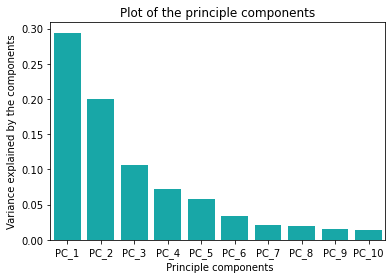

In [67]:
df2 = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10']})
sns.barplot(x='PC',y="var", 
           data=df2, color="c")
plt.xlabel(" Principle components")
plt.ylabel("Variance explained by the components")
plt.title("Plot of the principle components")
plt.show()

In [68]:
processed_data_path = os.path.join(os.path.pardir, '/Users/Acer','jupyterPro')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

# train data
principal_df.to_csv(write_train_path,index = False)
#test data
y_train_res.to_csv(write_test_path,index = False)